 ## <a id='0'> **1. ANÁLISIS EXPLORATORIO DE DATOS (EDA) - NFL 🏈** </a>
##### *THE BRIDGE - DATA_SCIENCE 2023*
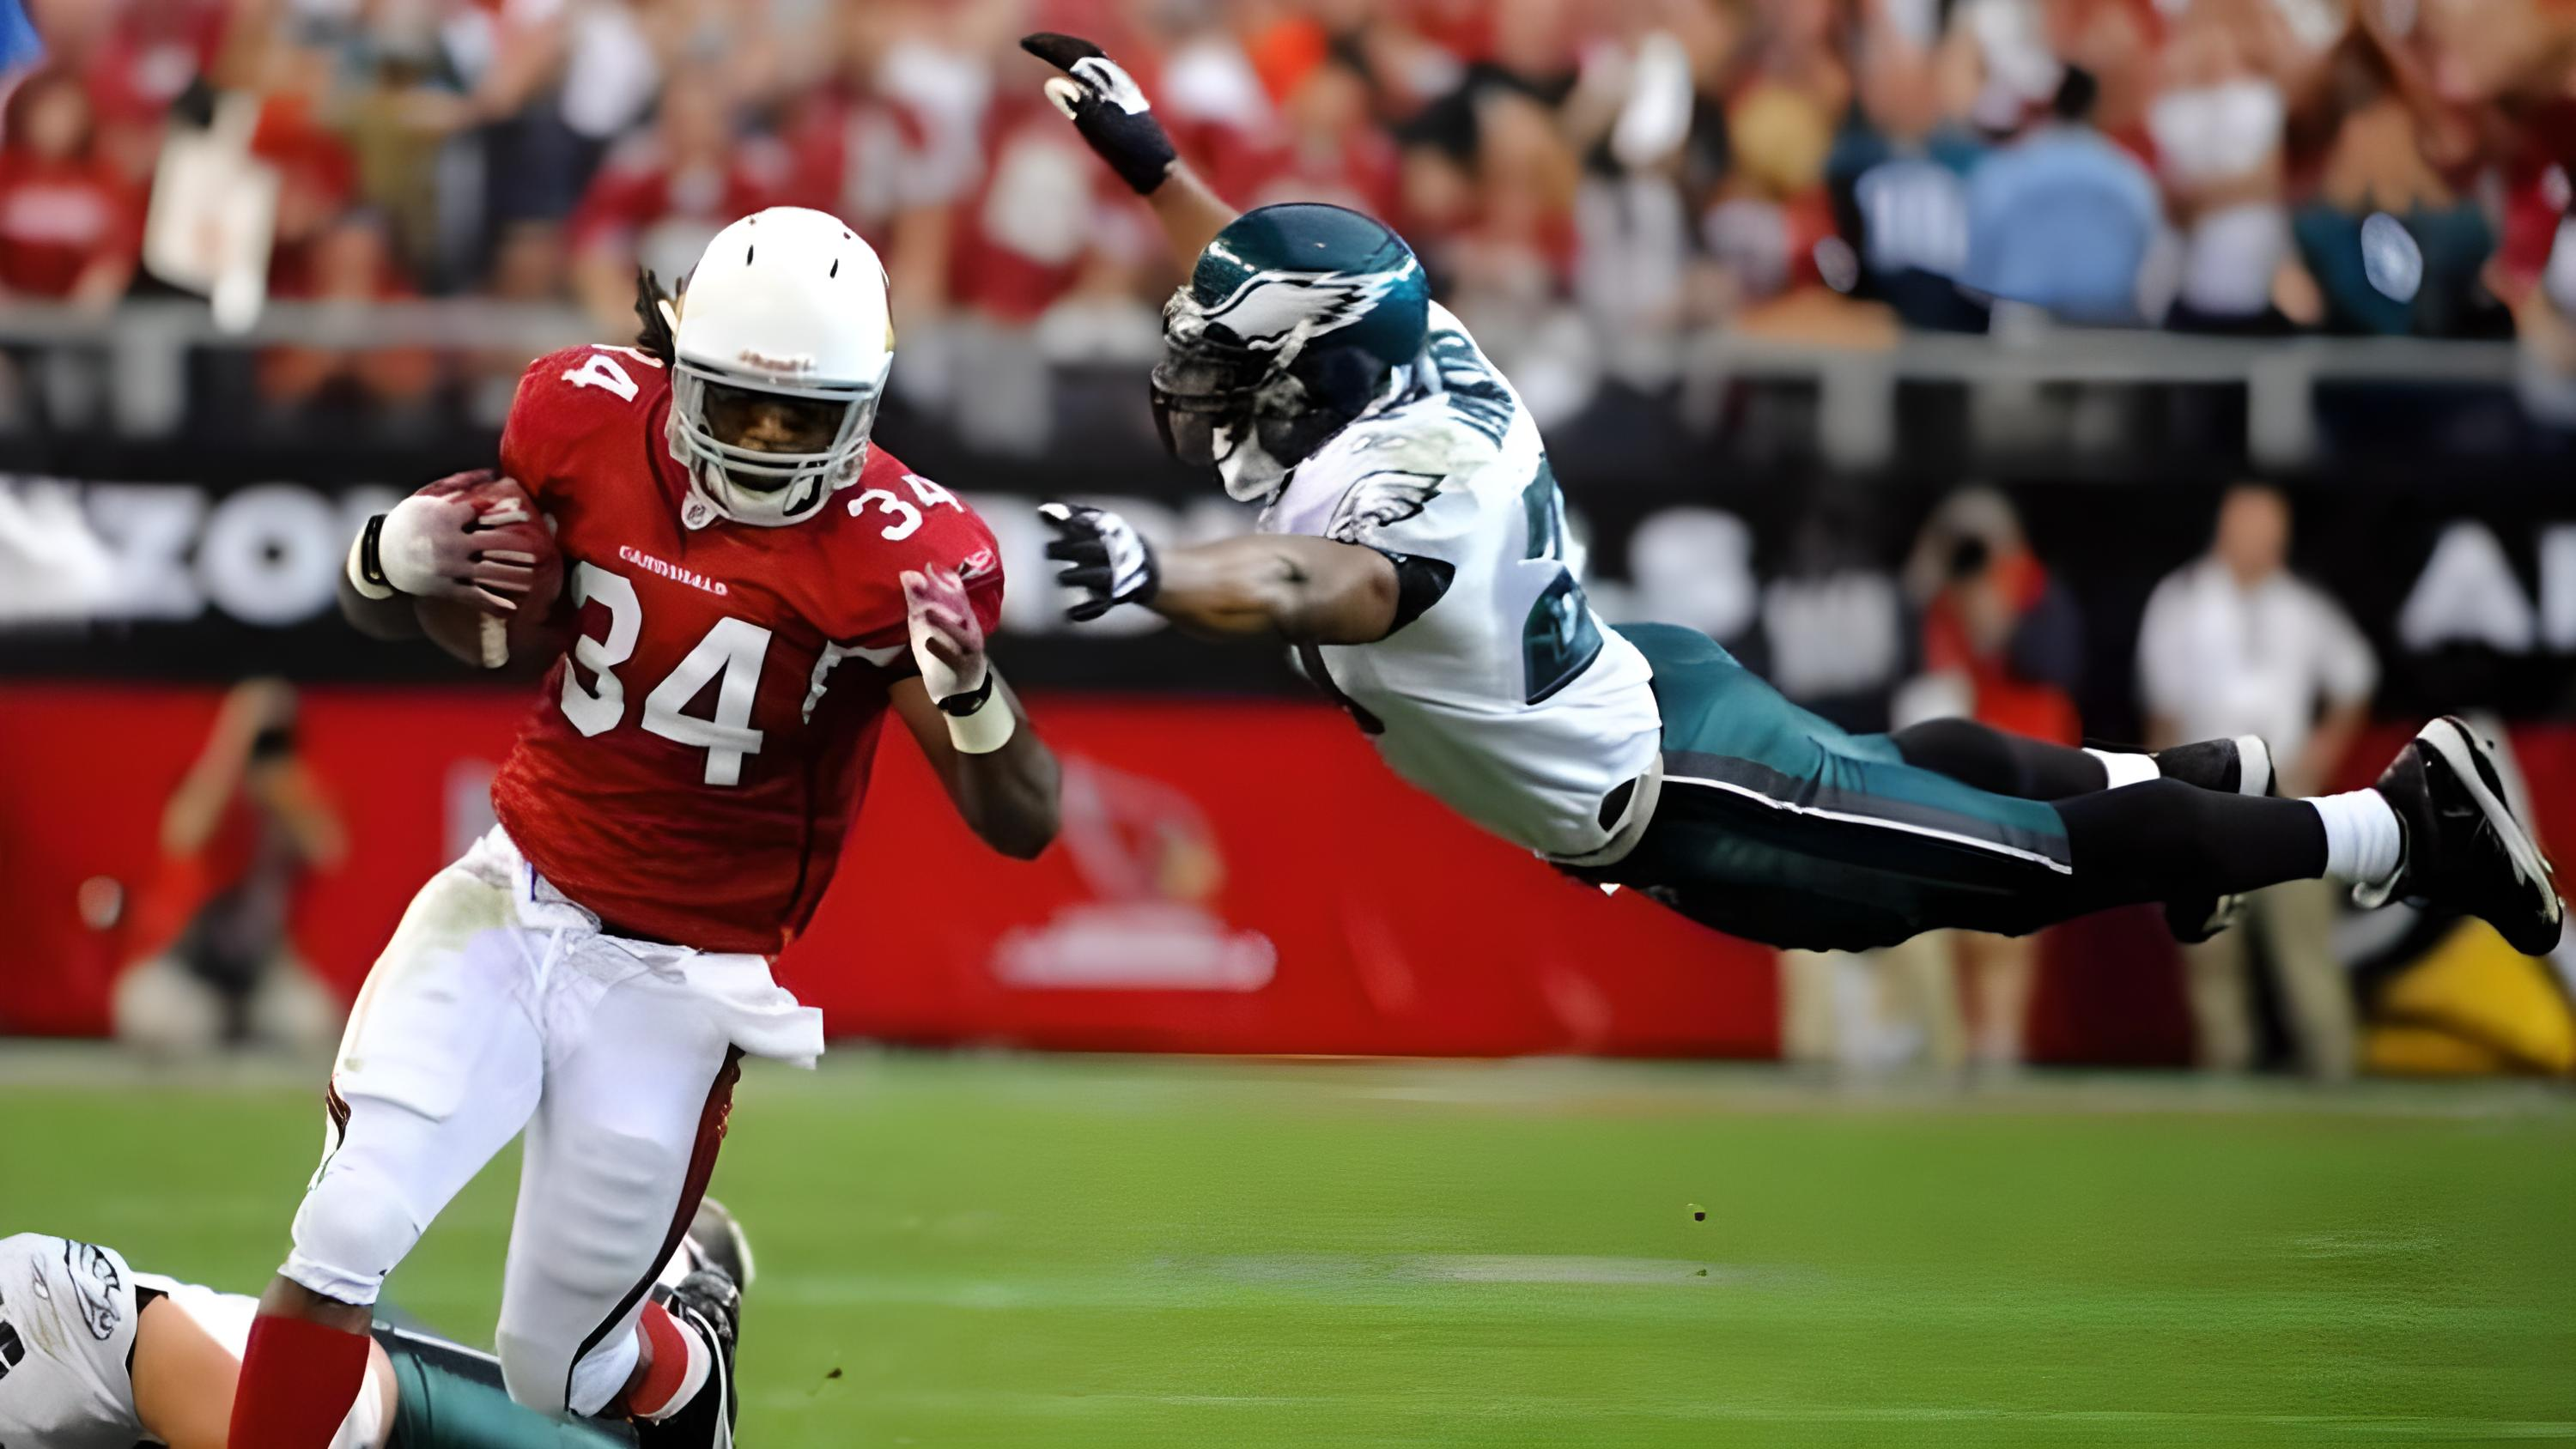

## <a id='1'> *ÍNDICE:* </a>
---
- [1. Introducción:](#3)
    - [1.1. Hipótesis](#11)
    - [1.2. Limpieza de datos](5#)
        - [1.2.1 ](44#)
        - [1.2.3 Visualización](123#)
- [2. Conclusiones](#4)

-----
####  *Contacto*:
*Aquí podrás encontrar mi perfil personal*:
-   [LinkedIn](https://www.linkedin.com/in/ivancorderoc/) ![LinkedIn](/Users/ivanlamb/Documents/GitHub/eda_nfl/src/img/linkedin.png)

*Para dudas y consultas*:
-   [Gmail](ivan.corderocueva@gmail.com) ![Gmail](/Users/ivanlamb/Documents/GitHub/eda_nfl/src/img/gmail.png)

*Mi baúl con todos mis proyectos:
-   [GitHub](https://github.com/ivancorderoc) ![GitHub](/Users/ivanlamb/Documents/GitHub/eda_nfl/src/img/github.png)
-----

# <a id='3'>**1. Introducción**</a>

#### Este estudio se ha realizado gracias a una libreria dedica a la NFL y a Wikipedia.

La idea fundamental del proyecto es dilucidar si el estar sano influye significativamnete en el éxito de jugador. 
Así como también si a pesar de esas lesiones su grado de desempeño en el campo le permite ser un jugador referente.

 ## <a id='4'> **1.1 Hipótesis.** </a>

1.  **¿Cuál es la relación entre lesiones y éxito en la NFL?**
2.  **¿Las consideras lesiones severas son las más habituales?**
3.  **¿Las lesiones leves pueden terminar con la carrera de los profesionales?**    
4.  **¿En qué época de la temporada regular existen más lesiones?**
5.  **¿Cuál es la posición que tiende lesionarse?**
6.  **¿Qué hace la NFL para intentar reducir el número de lesiones para que no acaben con la carrera/vida de los jugadores? *(pregunta a futuro)***


## <a id='4'> **1.1 Limpieza de datos.** </a>

### ***Presentación de nuestros datasets***.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

In [135]:
# Asignamos variables a los datasets con los que vamos a trabajar.
ranks_nfl = pd.read_csv("/Users/ivanlamb/Documents/GitHub/eda_nfl/src/data/processed/ranks_nfl.csv")
injuries = pd.read_csv("/Users/ivanlamb/Documents/GitHub/eda_nfl/src/data/processed/injuries.csv")

In [136]:
ranks_nfl.head(10)

,Rank,Player,Position,2010 Team,2011 Team,Reference,Year,2012 Team,Rank Change,2013 Team,2014 Team,2015 Team,2015 team,2016 team,Rank change,2017 team,Year accomplishments,2018 team,2019 team,2020 team
0,1,Tom Brady,Quarterback,New England Patriots,NaN,1.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Peyton Manning,Quarterback,Indianapolis Colts,NaN,2.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Adrian Peterson,Running back,Minnesota Vikings,NaN,3.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Ray Lewis,Linebacker,Baltimore Ravens,NaN,4.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Ed Reed,Safety,Baltimore Ravens,NaN,5.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Troy Polamalu,Safety,Pittsburgh Steelers,NaN,6.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Andre Johnson,Wide receiver,Houston Texans,NaN,7.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Darrelle Revis,Cornerback,New York Jets,NaN,8.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Drew Brees,Quarterback,New Orleans Saints,NaN,9.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Julius Peppers,Defensive end,Chicago Bears,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# Vemos la informacion que nos da el *primer dataset*
print(ranks_nfl.shape)
print(ranks_nfl.info())

(1000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  1000 non-null   int64  
 1   Player                1000 non-null   object 
 2   Position              1000 non-null   object 
 3   2010 Team             100 non-null    object 
 4   2011 Team             108 non-null    object 
 5   Reference             974 non-null    object 
 6   Year                  1000 non-null   float64
 7   2012 Team             105 non-null    object 
 8   Rank Change           400 non-null    object 
 9   2013 Team             111 non-null    object 
 10  2014 Team             106 non-null    object 
 11  2015 Team             9 non-null      object 
 12  2015 team             100 non-null    object 
 13  2016 team             105 non-null    object 
 14  Rank change           500 non-null    object 
 15  2017 team  

In [138]:
# Vemos los unicos de cada columna
print(ranks_nfl.nunique())

Rank                    100
Player                  403
Position                 20
2010 Team                30
2011 Team                34
Reference               274
Year                     10
2012 Team                32
Rank Change              68
2013 Team                33
2014 Team                31
2015 Team                 8
2015 team                32
2016 team                30
Rank change              68
2017 team                29
Year accomplishments    303
2018 team                32
2019 team                33
2020 team                14
dtype: int64


In [139]:
injuries.head(10)

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2010.0,REG,ARI,1.0,00-0027007,RB,Chris Wells,Chris,Wells,Knee,NaN,Questionable,Knee,NaN,Did Not Participate In Practice,2010-09-10 12:13:53
1,2010.0,REG,ARI,1.0,00-0022288,RB,Jason Wright,Jason,Wright,Toe,NaN,Questionable,Toe,NaN,Limited Participation in Practice,2010-09-10 12:13:44
2,2010.0,REG,ARI,1.0,00-0025668,CB,Michael Adams,Michael,Adams,Shoulder,NaN,Probable,Shoulder,NaN,Full Participation in Practice,NaN
3,2010.0,REG,ARI,1.0,00-0026939,LB,Will Davis,Will,Davis,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
4,2010.0,REG,ARI,1.0,00-0022921,WR,Larry Fitzgerald,Larry,Fitzgerald,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
5,2010.0,REG,ARI,1.0,00-0025602,TE,Ben Patrick,Ben,Patrick,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
6,2010.0,REG,ARI,1.0,00-0013126,LB,Joey Porter,Joey,Porter,Back,NaN,Probable,Back,NaN,Full Participation in Practice,NaN
7,2010.0,REG,ARI,1.0,00-0027691,WR,Andre Roberts,Andre,Roberts,Shoulder,NaN,Probable,Shoulder,NaN,Full Participation in Practice,NaN
8,2010.0,REG,ATL,1.0,00-0022781,WR,Michael Jenkins,Michael,Jenkins,Shoulder,NaN,Out,Shoulder,NaN,Did Not Participate In Practice,2010-09-10 12:53:27
9,2010.0,REG,ATL,1.0,00-0024183,CB,Brent Grimes,Brent,Grimes,Hip,NaN,Questionable,Hip,NaN,Full Participation in Practice,2010-09-10 12:52:50


In [140]:
# Vemos la informacion que nos da el *segundo* dataset*
print(injuries.shape)
print(injuries.info())

(51119, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51119 entries, 0 to 51118
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     51119 non-null  float64
 1   game_type                  51119 non-null  object 
 2   team                       51119 non-null  object 
 3   week                       51119 non-null  float64
 4   gsis_id                    51119 non-null  object 
 5   position                   51119 non-null  object 
 6   full_name                  51119 non-null  object 
 7   first_name                 51119 non-null  object 
 8   last_name                  51119 non-null  object 
 9   report_primary_injury      39778 non-null  object 
 10  report_secondary_injury    2145 non-null   object 
 11  report_status              39778 non-null  object 
 12  practice_primary_injury    51074 non-null  object 
 13  practice_secondary_injury  2773 no

In [141]:
# Vemos los unicos de cada columna

print(injuries.nunique())

season                          10
game_type                        5
team                            34
week                            21
gsis_id                       4470
position                        17
full_name                     4416
first_name                    1575
last_name                     2522
report_primary_injury          164
report_secondary_injury        103
report_status                    4
practice_primary_injury        194
practice_secondary_injury      130
practice_status                  5
date_modified                31553
dtype: int64


## *Limpieza de nuestros datasets.*
-   ### Primer dataset:

In [142]:
# Eliminamos todas las columnas innecesarias y las organizamos.

ranks_nfl = ranks_nfl.reindex(columns=["Rank", "Player", "Position", "Year"])

In [143]:
# Cambiamos los nombres en nuestra columna "Position"

ranks_nfl["Position"].replace({"Wide Receiver":"Wide receiver",
                              "Fullback":"Running back",
                              "Strong safety":"Safety",
                              "Free safety":"Safety",
                              "Outside linebacker":"Linebacker",
                              "Offensive Tackle" :"Offensive tackle",
                              "Defensive Tackle":"Defensive tackle"}, inplace=True)

-   ### *Segundo dataset:*

In [144]:
# Procedemos a eliminar columnas que no son importantes y de paso estandarizamos varios los nombres de las columnas
injuries.drop(columns=["gsis_id", 
                       "first_name",
                       "last_name",
                       "report_secondary_injury",
                       "practice_secondary_injury",
                       "date_modified"],
              inplace=True)
injuries.rename(columns={'season':'Year',
                         'game_type':'Season',
                         'team':'Team',
                         'position':'Position',
                         'full_name': 'Player',
                         'week': 'Week'},
                inplace=True)

In [145]:
# eliminamos los valores faltantes y vemos como se va reduciendo nuestro dataset

injuries.dropna(inplace=True)
injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39733 entries, 0 to 51111
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     39733 non-null  float64
 1   Season                   39733 non-null  object 
 2   Team                     39733 non-null  object 
 3   Week                     39733 non-null  float64
 4   Position                 39733 non-null  object 
 5   Player                   39733 non-null  object 
 6   report_primary_injury    39733 non-null  object 
 7   report_status            39733 non-null  object 
 8   practice_primary_injury  39733 non-null  object 
 9   practice_status          39733 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.3+ MB


In [146]:
# Nos centraremos en jugadores que realmente están reportados como lesionados

injuries = injuries.loc[(injuries["practice_status"]== injuries["practice_status"].unique()[0]) | (injuries["practice_status"]== injuries["practice_status"].unique()[-1]) ]

In [147]:
# Nuestro análisis se centrará en la temporada regular

injuries = injuries[injuries["Season"].str.contains("REG")]

In [148]:
# Limpiamos la columna "Position"

injuries["Position"].replace({"LB":"Linebacker",
                              "WR":"Wide receiver",
                              "CB":"Cornerback",
                              "RB":"Running back",
                              "S":"Safety",
                              "DE":"Defense end",
                              "T":"Offensive tackle",
                              "DT":"Defensive tackle",
                              "TE": "Tight end",
                              "G": "Guard",
                              "QB":"Quarterback",
                              "C": "Center",
                              "K": "Kicker",
                              "P": "Punter",
                              "LS":"Long snapper",
                              "KR": "Kicker returner",
                              "PR":"Punt returner",}, inplace=True)


In [149]:
# Estandarizamos nuestras columnas para dejarlas en una categoría correspondiente.

injuries["report_primary_injury"].replace({"left Shoulder":"Shoulder",
                                   "right Shoulder":"Shoulder",
                                   "Right Shoulder":"Shoulder",
                                   "migraines":"Migraines",
                                   "(migraines)":"Migraines",
                                   "left Groin":"Groin",
                                   "right Groin":"Groin",
                                   "left Forearm":"Forearm",
                                   "right Knee":"Knee",
                                   "left Knee":"Knee",
                                   "right Finger":"Finger",
                                   "right hip":"Hip",
                                   "Quadricep":"Quadriceps",
                                   "right Quadricep":"Quadriceps",
                                   "rt. thumb":"Thumb",
                                   "right Thumb":"Thumb",
                                   "left Calf": "Calf",
                                   "right Calf": "Calf",
                                   "groin, knee, ankle": "Multiple",
                                   "Shoulder, Finger": "Multiple",
                                   "Bicep":"Biceps",
                                   "right Elbow": "Elbow",
                                   "Core": "Core Muscle",
                                   "Core Muscle Injury": "Core Muscle",
                                   "Right Collarbone": "Collarbone",
                                   "Medical Illness":"Illness",
                                   "left Wrist": "Wrist",
                                   "right Hamstring":"Hamstring",
                                   "Triceps":"Triceps",
                                   "right Hip":"Hip",}, inplace=True)


injuries["practice_primary_injury"].replace({"left Shoulder":"Shoulder",
                                   "right Shoulder":"Shoulder",
                                   "Right Shoulder":"Shoulder",
                                   "migraines":"Migraines",
                                   "(migraines)":"Migraines",
                                   "left Groin":"Groin",
                                   "right Groin":"Groin",
                                   "left Forearm":"Forearm",
                                   "right Knee":"Knee",
                                   "left Knee":"Knee",
                                   "right Finger":"Finger",
                                   "right hip":"Hip",
                                   "Quadricep":"Quadriceps",
                                   "right Quadricep":"Quadriceps",
                                   "rt. thumb":"Thumb",
                                   "right Thumb":"Thumb",
                                   "left Calf": "Calf",
                                   "right Calf": "Calf",
                                   "groin, knee, ankle": "Multiple",
                                   "Shoulder, Finger": "Multiple",
                                   "Bicep":"Biceps",
                                   "right Elbow": "Elbow",
                                   "Core": "Core Muscle",
                                   "Core Muscle Injury": "Core Muscle",
                                   "Right Collarbone": "Collarbone",
                                   "Medical Illness":"Illness",
                                   "left Wrist": "Wrist",
                                   "right Hamstring":"Hamstring",
                                   "Triceps":"Triceps",
                                   "right Hip":"Hip",
                                   "oblique": "Oblique"}, inplace=True)

In [150]:
# Actualizamos el nomnbre de dos equipos a fecha de hoy
injuries["Team"].replace({"SD":"LAC",
                          "STL":"LA",
                          "OAK":"LV",}
                         , inplace=True)

In [151]:
# Comprobamos el estado de nuestro dataset

injuries.iloc[[7]]

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
20,2010.0,REG,BUF,1.0,Linebacker,Reggie Torbor,Chest,Out,Chest,Did Not Participate In Practice


In [152]:
# Procedemos dejarlo con índice correcto

injuries.reset_index(drop=True, inplace=True)

###  **Análisis univariante**

Como podemos observar nuestros datasets fudamentalmente se caracterizan por ser de tipo categórico. Procedemos a valorar.

-   Primer dataset:

In [153]:
pos_rank = ranks_nfl["Position"].value_counts()
print(pos_rank)

Wide receiver       166
Quarterback         140
Linebacker          134
Running back        111
Defensive end       106
Cornerback           78
Safety               62
Defensive tackle     62
Tight end            54
Offensive tackle     49
Guard                25
Center               12
Kicker                1
Name: Position, dtype: int64


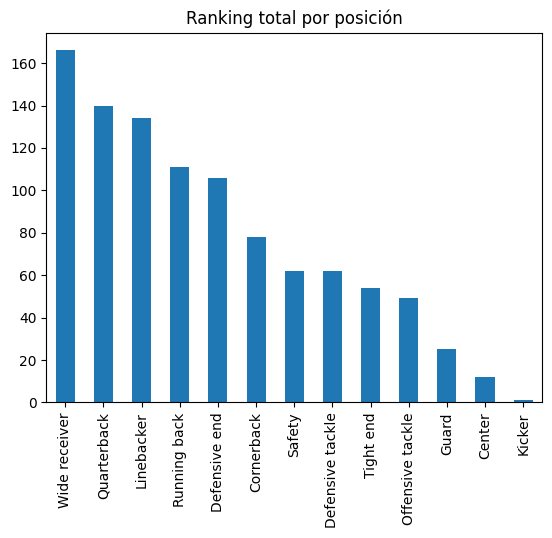

In [154]:
# Hacemos una pequeña visualización

pos_rank.plot(kind='bar', title= "Ranking total por posición");


-   Segundo dataset:

In [155]:
# Visualizacion 
period = injuries[["Week"]].value_counts()
print(period)

Week
3.0     849
5.0     840
4.0     826
13.0    804
6.0     796
7.0     796
14.0    794
17.0    785
12.0    779
15.0    778
11.0    723
8.0     716
2.0     708
10.0    698
9.0     693
16.0    682
1.0     544
dtype: int64


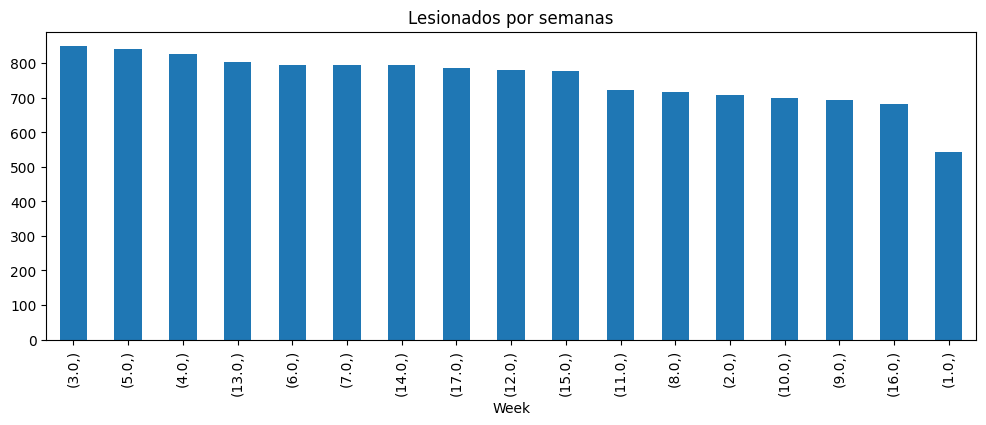

In [156]:
plt.figure(figsize=(12, 4))
period.plot(kind='bar', title= "Lesionados por semanas");

In [221]:
# Describe entre los años y las posiciones
cross_tab = pd.crosstab(index = injuries.Year, columns=injuries.Position)
cross_tab_matrix = np.array(cross_tab)
describe = cross_tab.describe()
describe

Position,Center,Cornerback,Defense end,Defensive tackle,Guard,Kicker,Kicker returner,Linebacker,Long snapper,Offensive tackle,Punt returner,Punter,Quarterback,Running back,Safety,Tight end,Wide receiver
count,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,33.600000,165.100000,101.100000,85.500000,71.4000,8.500000,0.300000,194.700000,2.100000,102.200000,0.100000,2.900000,37.100000,117.300000,111.700000,86.000000,161.500000
std,11.276327,15.088259,12.810152,14.183324,10.6479,5.212165,0.674949,33.770632,2.024846,17.586611,0.316228,2.024846,12.653063,19.362335,12.311241,14.368175,25.211329
min,21.000000,140.000000,85.000000,69.000000,57.0000,0.000000,0.000000,151.000000,0.000000,76.000000,0.000000,0.000000,22.000000,85.000000,93.000000,62.000000,124.000000
25%,25.000000,157.750000,90.250000,75.250000,61.5000,6.000000,0.000000,165.250000,1.000000,87.750000,0.000000,1.250000,28.750000,104.250000,104.000000,75.250000,145.250000
50%,30.500000,165.500000,100.500000,80.500000,72.5000,7.000000,0.000000,199.500000,1.500000,101.000000,0.000000,3.000000,34.500000,120.500000,108.000000,85.000000,155.500000
75%,38.000000,177.500000,108.250000,97.750000,81.7500,11.250000,0.000000,215.000000,2.000000,118.250000,0.000000,4.000000,39.750000,129.500000,120.750000,97.750000,179.500000
max,57.000000,185.000000,124.000000,110.000000,83.0000,17.000000,2.000000,247.000000,7.000000,124.000000,1.000000,7.000000,59.000000,143.000000,133.000000,105.000000,203.000000


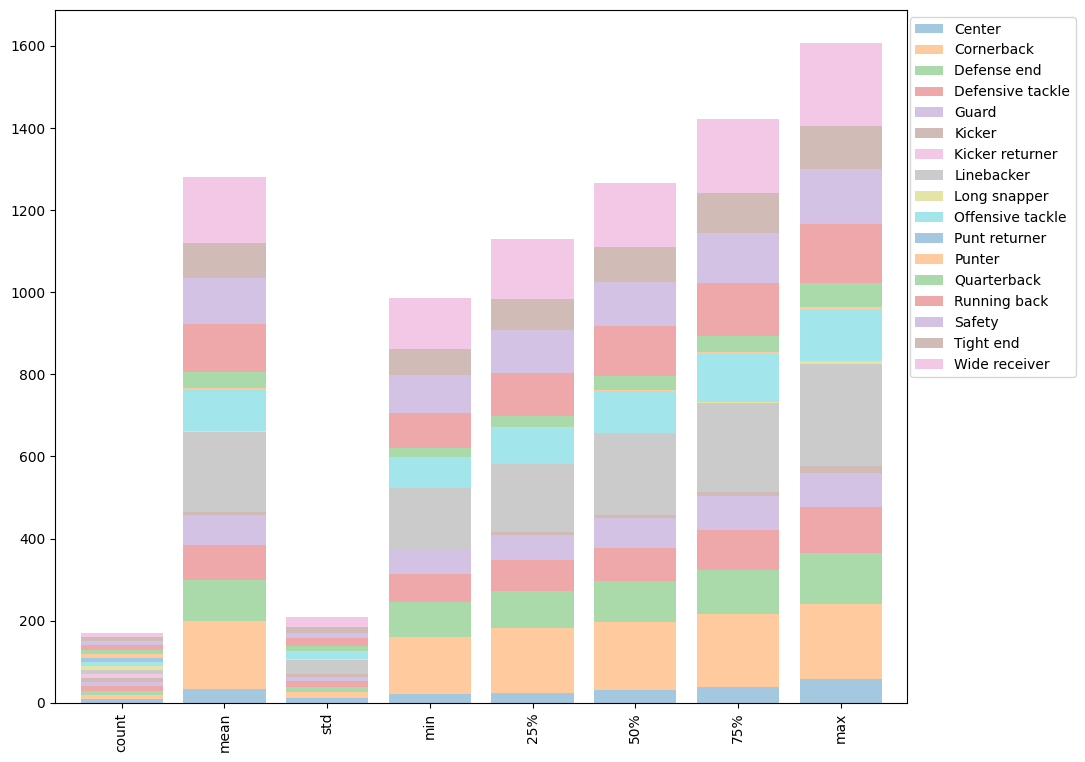

In [224]:
viz_describe = describe.plot(kind='bar', stacked=True, alpha=0.4, width=0.8, figsize=(11, 9),)
viz_describe.legend(loc='upper center', bbox_to_anchor=(1.1, 1));

###  **Análisis bivariante**

Empezamos a buscar relaciones en nuestros dataset

> ¿Cual es la relacion entre el exito y las lesiones de la carrera de un jugador?

In [210]:
injuries[injuries["Player"]=="Peyton Manning"]

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
1326,2011.0,REG,IND,1.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1401,2011.0,REG,IND,2.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1485,2011.0,REG,IND,3.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1582,2011.0,REG,IND,4.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1667,2011.0,REG,IND,5.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1757,2011.0,REG,IND,6.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1834,2011.0,REG,IND,7.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1910,2011.0,REG,IND,8.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
1975,2011.0,REG,IND,9.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)
2059,2011.0,REG,IND,10.0,Quarterback,Peyton Manning,Neck,Out,Neck,Out (Definitely Will Not Play)


In [212]:
# Lesiones de pyton manning
Manning = ranks_nfl[ranks_nfl["Player"]=="Peyton Manning"]
Manning

,Rank,Player,Position,Year
1,2,Peyton Manning,Quarterback,2010.0
149,50,Peyton Manning,Quarterback,2011.0
201,2,Peyton Manning,Quarterback,2012.0
300,1,Peyton Manning,Quarterback,2013.0
404,5,Peyton Manning,Quarterback,2014.0


> ¿En qué epoca del año los jugadores se lesionan más?

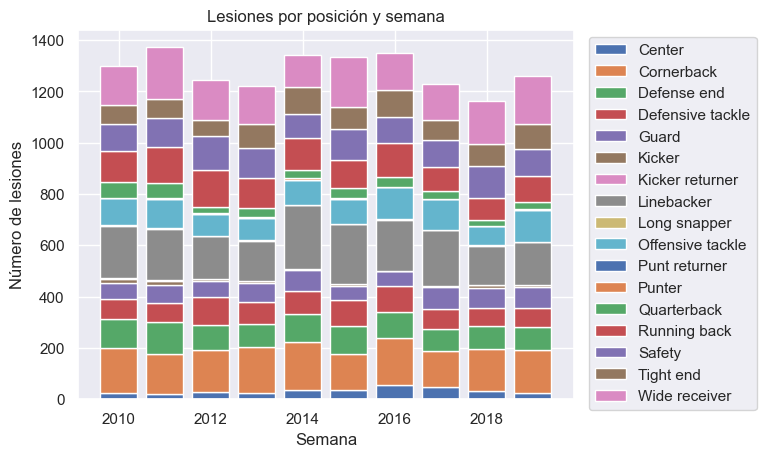

In [351]:
week_period = pd.crosstab(index=injuries.Week, columns=injuries.Position)
matrix_periods = np.array(periods)

fig, ax = plt.subplots()

for i in range(matrix_periods.shape[1]):
    if i == 0:
        ax.bar(periods.index, matrix_periods[:, i], label=periods.columns[i])
    else:
        ax.bar(periods.index, matrix_periods[:, i], bottom=np.sum(matrix_periods[:, :i], axis=1), label=periods.columns[i])

ax.set_xlabel('Semana')
ax.set_ylabel('Número de lesiones')
ax.set_title('Lesiones por posición y semana')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1));


Como podemos observar la tendencia 

La posición que más se lesiona es Linebacker


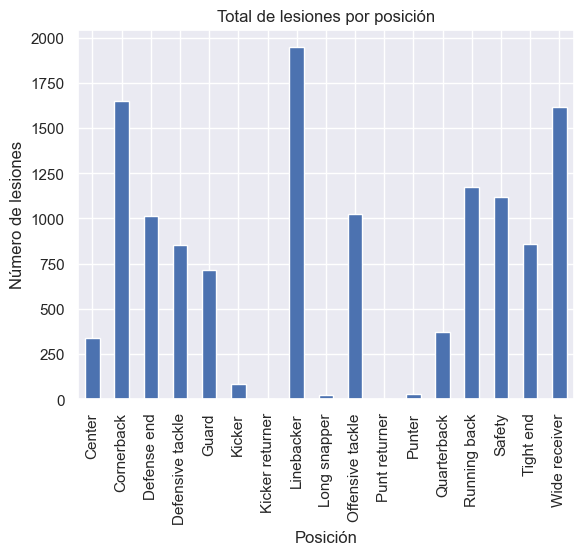

In [358]:
# Crear tabla cruzada
week_period = pd.crosstab(index=injuries.Week, columns=injuries.Position)

# Sumar el número de lesiones por posición
total_injuries_by_position = week_period.sum(axis=0)

# Ordenar de mayor a menor y obtener la posición con más lesiones
most_injured_position = total_injuries_by_position.sort_values(ascending=False).index[0]

print(f"La posición que más se lesiona es {most_injured_position}")

total_injuries_by_position.plot(kind='bar', xlabel='Posición', ylabel='Número de lesiones', title='Total de lesiones por posición');

Eddie Royal        33
Louis Delmas       31
Jordan Reed        27
Marcus Gilbert     26
A.J. Green         25
                   ..
Duane Brown        13
Adrian Peterson    13
Tyler Eifert       13
Shawn Lauvao       13
Kyle Rudolph       13
Name: Player, Length: 100, dtype: int64


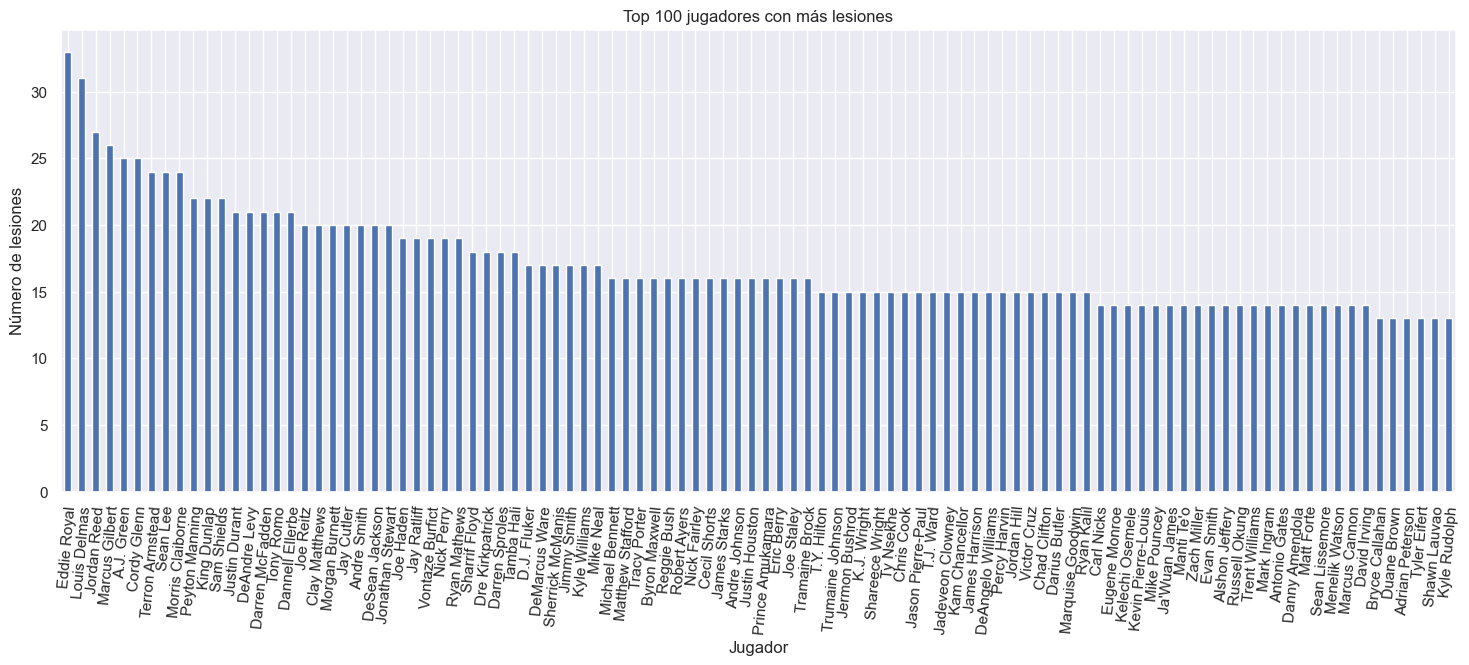

In [370]:
# Contar el número de lesiones por jugador
injuries_by_player = injuries['Player'].value_counts()

# Obtener los 100 jugadores con más lesiones
top_100_injured_players = injuries_by_player.head(100)

print(top_100_injured_players)

#Hacemos una visualizacion
plt.figure(figsize=(18,6))
top_100_injured_players.plot(kind='bar', xlabel='Jugador', ylabel='Número de lesiones', title='Top 100 jugadores con más lesiones')

plt.xticks(rotation=85)
plt.show()

In [371]:
# Contar el número de lesiones por jugador
injuries_by_player = injuries['Player'].value_counts()

# Seleccionar el jugador con el número máximo de lesiones
most_injured_player = injuries_by_player.idxmax()

print(f"El jugador que más se ha lesionado es {most_injured_player}. Ha estado casi 2 años fuera del terreno de juego")


El jugador que más se ha lesionado es Eddie Royal. Ha estado casi 2 años fuera del terreno de juego


#### Procedemos a intentar averiguar si hay dentro de nuestro top 100 de lesionados top 100 en los rankings

In [372]:
# cambiamos nuestra Serie a formato dataframe
top_100_injured_players = top_100_injured_players.to_frame()

# Hacemos un reset para tener nuevo indice generar una columna llamada "Player"
top_100_injured_players.reset_index(inplace=True)

# renombramos nuestras columnas
top_100_injured_players.rename(columns={"index":"Player", "Player":"Times"}, inplace=True)

#Hacemos una máscara para averiguar si exiten coincidencias
mascara = ranks_nfl['Player'].isin(top_100_injured_players['Player'])

# Numero de veces han coincido que un jugador ha estado dentro del top 100
injury_top = mascara.sum()

print(f"El número de veces que jugadores dentro del top 100 lesionados hay aparecido en el top 100 de los mejores es de: {injury_top} ")

El número de veces que jugadores dentro del top 100 lesionados hay aparecido en el top 100 de los mejores es de: 126 


126

In [231]:
media_pos = cross_tab.describe()
media_pos

Position,Center,Cornerback,Defense end,Defensive tackle,Guard,Kicker,Kicker returner,Linebacker,Long snapper,Offensive tackle,Punt returner,Punter,Quarterback,Running back,Safety,Tight end,Wide receiver
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,19.764706,97.117647,59.470588,50.294118,42.000000,5.00000,0.176471,114.529412,1.235294,60.117647,0.058824,1.705882,21.823529,69.000000,65.705882,50.588235,95.000000
std,4.023826,12.673212,8.839667,8.900595,5.645795,2.09165,0.392953,15.395282,1.393261,8.014692,0.242536,1.723539,5.592800,11.958261,9.524736,9.925087,14.555927
min,9.000000,72.000000,43.000000,35.000000,27.000000,2.00000,0.000000,84.000000,0.000000,51.000000,0.000000,0.000000,12.000000,43.000000,51.000000,27.000000,61.000000
25%,18.000000,90.000000,53.000000,44.000000,40.000000,4.00000,0.000000,106.000000,0.000000,55.000000,0.000000,0.000000,18.000000,63.000000,59.000000,44.000000,88.000000
50%,21.000000,99.000000,61.000000,51.000000,43.000000,5.00000,0.000000,118.000000,1.000000,57.000000,0.000000,1.000000,22.000000,69.000000,62.000000,51.000000,94.000000
75%,22.000000,107.000000,67.000000,54.000000,46.000000,6.00000,0.000000,125.000000,2.000000,63.000000,0.000000,3.000000,26.000000,75.000000,71.000000,58.000000,102.000000
max,25.000000,119.000000,72.000000,67.000000,50.000000,9.00000,1.000000,137.000000,4.000000,85.000000,1.000000,5.000000,33.000000,87.000000,83.000000,64.000000,125.000000


##### ***3. Fuentes***<a id='4'></a>
- Datasets: injuries: [Libreria NFL]("https://pypi.org/project/nfl-data-py/"), [Wikipedia]("https://en.wikipedia.org/wiki/NFL_Top_100")

## <a href ='#0'> 🔝 To the moon 🔝 </a>